<a href="https://colab.research.google.com/github/nishchaypawar19/NISHCHAY-PORTFOLIO/blob/main/CUSTOMER_CHURN_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/saas_user_behavior_dataset.csv')

In [3]:
df.head(5)

,UserID,SignupDate,Country,DeviceType,LoginFrequencyPerWeek,AvgSessionDurationMin,PagesPerSession,SupportTicketsLast90Days,SubscriptionPlan,FeatureUsed_ML,FeatureUsed_AutoReport,UsedInLast30Days,ConvertedToPaid
0,f40d2326-cd4f-4dce-86b9-0362fa867844,30-05-2024,Germany,Desktop,2,15.64,3.1,0,Free,1,0,1,1
1,b2398a9b-2845-45eb-88cc-bed0fa6b2286,26-02-2024,Canada,Mobile,0,15.43,5.3,1,Free,0,0,0,0
2,5bee3a46-095a-40e6-94ec-693df9cd1116,17-05-2024,UK,Desktop,4,22.62,4.0,0,Enterprise,0,0,1,1
3,52b53901-9840-4964-adf5-77a59c0b3cce,26-03-2024,Canada,Desktop,3,8.17,1.9,0,Free,0,0,0,0
4,494faf78-db2b-4119-a9c0-4c9c81de60a9,01-12-2023,Canada,Desktop,2,6.39,3.4,0,Free,0,1,0,0


In [4]:
df.describe()

,LoginFrequencyPerWeek,AvgSessionDurationMin,PagesPerSession,SupportTicketsLast90Days,FeatureUsed_ML,FeatureUsed_AutoReport,UsedInLast30Days,ConvertedToPaid
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.957000,14.741200,3.97140,0.446000,0.310000,0.409000,0.788000,0.798000
std,1.668513,4.925049,1.55306,0.682312,0.462725,0.491895,0.408929,0.401693
min,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,11.547500,2.90000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.000000,14.710000,4.00000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,4.000000,18.052500,5.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.000000,30.070000,8.90000,4.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   UserID                    1000 non-null   object 
 1   SignupDate                1000 non-null   object 
 2   Country                   1000 non-null   object 
 3   DeviceType                1000 non-null   object 
 4   LoginFrequencyPerWeek     1000 non-null   int64  
 5   AvgSessionDurationMin     1000 non-null   float64
 6   PagesPerSession           1000 non-null   float64
 7   SupportTicketsLast90Days  1000 non-null   int64  
 8   SubscriptionPlan          1000 non-null   object 
 9   FeatureUsed_ML            1000 non-null   int64  
 10  FeatureUsed_AutoReport    1000 non-null   int64  
 11  UsedInLast30Days          1000 non-null   int64  
 12  ConvertedToPaid           1000 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 101.7+ KB


In [11]:
df['Country'].value_counts()

,count
Country,
India,210
Germany,206
Canada,204
UK,190
USA,190


In [6]:
df.isnull().sum()

,0
UserID,0
SignupDate,0
Country,0
DeviceType,0
LoginFrequencyPerWeek,0
AvgSessionDurationMin,0
PagesPerSession,0
SupportTicketsLast90Days,0
SubscriptionPlan,0
FeatureUsed_ML,0


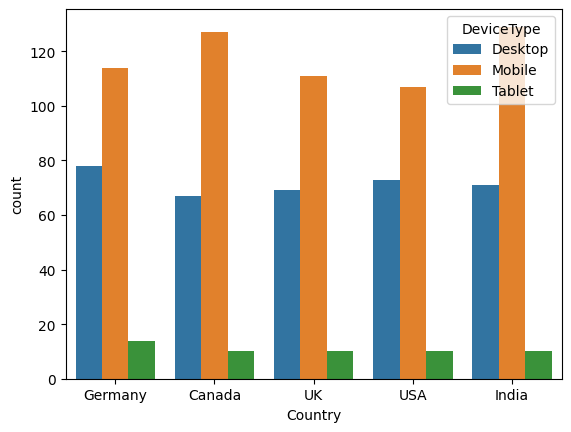

In [16]:
sns.countplot(data=df, x='Country', hue='DeviceType')
plt.show()

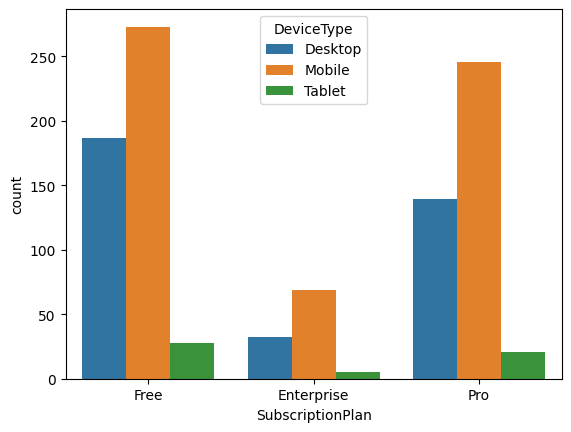

In [22]:
sns.countplot(data=df, x='SubscriptionPlan', hue='DeviceType')
plt.show()

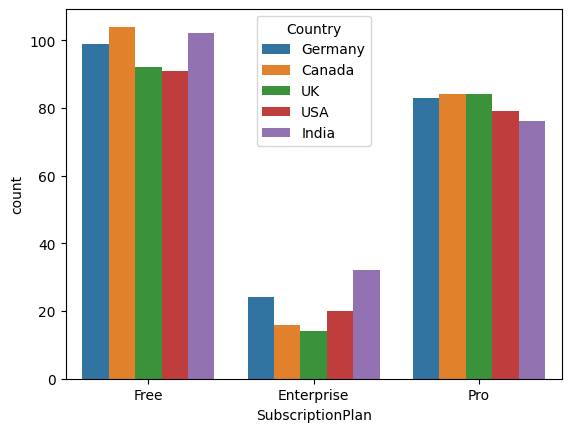

<Figure size 640x480 with 0 Axes>

In [24]:
sns.countplot(data=df, x='SubscriptionPlan', hue='Country')
plt.show()
plt.tight_layout()

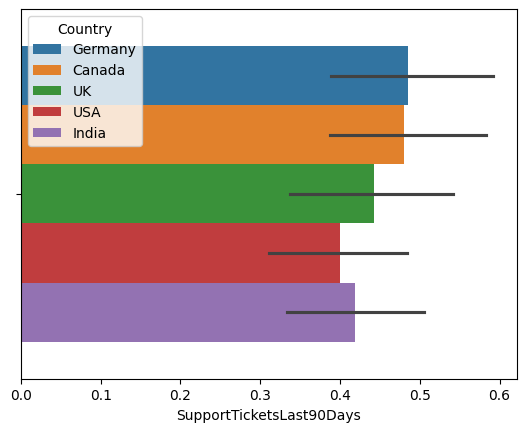

<Figure size 640x480 with 0 Axes>

In [27]:
sns.barplot(data=df, x='SupportTicketsLast90Days', hue='Country')
plt.show()
plt.tight_layout()

In [36]:
df.drop_duplicates()

,UserID,SignupDate,Country,DeviceType,LoginFrequencyPerWeek,AvgSessionDurationMin,PagesPerSession,SupportTicketsLast90Days,SubscriptionPlan,FeatureUsed_ML,FeatureUsed_AutoReport,UsedInLast30Days,ConvertedToPaid
0,f40d2326-cd4f-4dce-86b9-0362fa867844,2024-05-30,Germany,Desktop,2,15.64,3.1,0,Free,1,0,1,1
1,b2398a9b-2845-45eb-88cc-bed0fa6b2286,2024-02-26,Canada,Mobile,0,15.43,5.3,1,Free,0,0,0,0
2,5bee3a46-095a-40e6-94ec-693df9cd1116,2024-05-17,UK,Desktop,4,22.62,4.0,0,Enterprise,0,0,1,1
3,52b53901-9840-4964-adf5-77a59c0b3cce,2024-03-26,Canada,Desktop,3,8.17,1.9,0,Free,0,0,0,0
4,494faf78-db2b-4119-a9c0-4c9c81de60a9,2023-12-01,Canada,Desktop,2,6.39,3.4,0,Free,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,39c8f6eb-7467-4059-81cd-951517051a5b,2024-06-08,USA,Desktop,1,21.12,5.6,1,Free,0,0,1,0
996,363e7e55-5bdb-4c40-8701-5f8432b4c008,2023-12-18,India,Mobile,6,18.07,3.7,0,Pro,1,0,1,1
997,cd86a529-d2c7-4c1d-b971-b3cdad882e69,2023-11-22,India,Desktop,2,3.73,4.1,1,Free,1,1,0,1
998,935910c7-e3db-4e16-b39f-002fb8cae90c,2023-12-03,Germany,Mobile,5,11.66,4.7,0,Pro,0,0,1,1


In [33]:
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# Apply to your dataset
numerical_cols = ["LoginFrequencyPerWeek", "AvgSessionDurationMin", "PagesPerSession", "SupportTicketsLast90Days"]
df_iqr_cleaned = remove_outliers_iqr(df, numerical_cols)


In [35]:
df["SignupDate"] = pd.to_datetime(df["SignupDate"])

In [37]:
df["DaysSinceSignup"] = (pd.Timestamp.today() - df["SignupDate"]).dt.days


In [43]:
df.head(2)

,UserID,Country,DeviceType,LoginFrequencyPerWeek,AvgSessionDurationMin,PagesPerSession,SupportTicketsLast90Days,SubscriptionPlan,FeatureUsed_ML,FeatureUsed_AutoReport,UsedInLast30Days,ConvertedToPaid,DaysSinceSignup,SignupMonth,SignupYear,SignupWeekday
0,f40d2326-cd4f-4dce-86b9-0362fa867844,Germany,Desktop,2,15.64,3.1,0,Free,1,0,1,1,434,5,2024,Thursday
1,b2398a9b-2845-45eb-88cc-bed0fa6b2286,Canada,Mobile,0,15.43,5.3,1,Free,0,0,0,0,528,2,2024,Monday


In [39]:
df["SignupMonth"] = df["SignupDate"].dt.month
df["SignupYear"] = df["SignupDate"].dt.year
df["SignupWeekday"] = df["SignupDate"].dt.day_name()


In [42]:
df.drop("SignupDate", axis=1, inplace=True)



In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode categorical features if not already numeric
categorical_cols = ["Country", "DeviceType", "SubscriptionPlan"]
df_encoded = df.copy()

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Step 2: Define X (features) and y (target)
X = df_encoded[categorical_cols + ["FeatureUsed_ML", "FeatureUsed_AutoReport", "UsedInLast30Days"]]
y = df_encoded["ConvertedToPaid"]

# Step 3: Apply Chi-Square test
selector = SelectKBest(score_func=chi2, k='all')
chi_scores = selector.fit(X, y)

# Step 4: Show scores
for feature, score in zip(X.columns, chi_scores.scores_):
    print(f"{feature}: Chi2 Score = {score:.2f}")


Country: Chi2 Score = 0.03
DeviceType: Chi2 Score = 0.00
SubscriptionPlan: Chi2 Score = 5.07
FeatureUsed_ML: Chi2 Score = 38.08
FeatureUsed_AutoReport: Chi2 Score = 45.25
UsedInLast30Days: Chi2 Score = 39.88


In [45]:
selected_features = [
    "SubscriptionPlan",
    "FeatureUsed_ML",
    "FeatureUsed_AutoReport",
    "UsedInLast30Days"
]


In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le=LabelEncoder()

In [50]:
X = df_encoded[selected_features]
y = df_encoded["ConvertedToPaid"]


In [53]:
df = pd.get_dummies(df, columns=["SubscriptionPlan"], drop_first=True)


In [54]:
X

,SubscriptionPlan,FeatureUsed_ML,FeatureUsed_AutoReport,UsedInLast30Days
0,1,1,0,1
1,1,0,0,0
2,0,0,0,1
3,1,0,0,0
4,1,0,1,0
...,...,...,...,...
995,1,0,0,1
996,2,1,0,1
997,1,1,1,0
998,2,0,0,1


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
from sklearn.model_selection import train_test_split

# Define input features (only the useful ones after Chi2 test)
X = df_encoded[["SubscriptionPlan", "FeatureUsed_ML", "FeatureUsed_AutoReport", "UsedInLast30Days"]]

# Define the target
y = df_encoded["ConvertedToPaid"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (800, 4)
Test set shape: (200, 4)


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 2: Make predictions
y_pred = model.predict(X_test)

# Step 3: Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[ 17  23]
 [  4 156]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.42      0.56        40
           1       0.87      0.97      0.92       160

    accuracy                           0.86       200
   macro avg       0.84      0.70      0.74       200
weighted avg       0.86      0.86      0.85       200


Accuracy Score:
0.865
